In [1]:
!pip install matplotlib

In [1]:
%%time
import pandas as pd

data = pd.read_csv("urldata.csv")
data = data.sample(frac=1, random_state=0)
data

CPU times: total: 594 ms
Wall time: 3.27 s


,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
9394,promohinotruck.com,0,0,1,5,0,0,0,0,0,1,0,1,0,0,1,0,1
898,kakaku.com,0,0,1,6,0,0,0,0,0,1,0,0,0,0,1,0,0
2398,distractify.com,0,0,1,10,0,0,0,0,0,1,0,1,0,0,1,0,0
5906,planwise.co.za,0,0,1,8,0,0,0,0,0,1,1,1,0,0,1,0,1
2343,seekingalpha.com,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,0442d60.wcomhost.com,0,0,0,2,0,0,1,0,0,0,0,1,0,0,1,0,1
4859,elitedaily.com,0,0,1,4,0,0,0,0,0,1,0,1,0,0,1,0,0
3264,mylust.com,0,0,1,3,0,0,1,0,0,1,1,1,0,0,1,0,0
9845,101jo.com,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1


In [2]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.3, random_state=0)
test_data, valid_data = train_test_split(test_data, test_size=0.5, random_state=0)
len(train_data), len(valid_data), len(test_data)

(7000, 1500, 1500)

In [3]:
features = ["Domain", "Have_IP", "Have_At", "URL_Length", "URL_Depth", "Redirection", "https_Domain", "TinyURL", "Prefix/Suffix", "DNS_Record", "Web_Traffic", "Domain_Age", "Domain_End", "iFrame", "Mouse_Over", "Right_Click", "Web_Forwards"]
train_data[features]

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
9890,my-tee-shirt.com,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0
3384,distractify.com,0,0,1,10,0,0,0,0,0,1,0,1,0,0,1,0
7936,atenegocios.com,0,0,1,2,0,0,0,0,0,1,0,0,0,0,1,0
4277,cox.com,0,0,1,4,0,0,1,0,0,1,1,1,0,0,1,0
9642,comdi3horas.joomla.com,0,0,0,3,0,0,0,0,0,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2309,ck101.com,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,0
1849,motthegioi.vn,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0
7957,appriver3651009905-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0
1720,superuser.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0


In [4]:
label = "Label" #not phishing(0) and phishing(1)
train_data[label]

9890    1
3384    0
7936    1
4277    0
9642    1
       ..
2309    0
1849    0
7957    1
1720    0
445     0
Name: Label, Length: 7000, dtype: int64

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

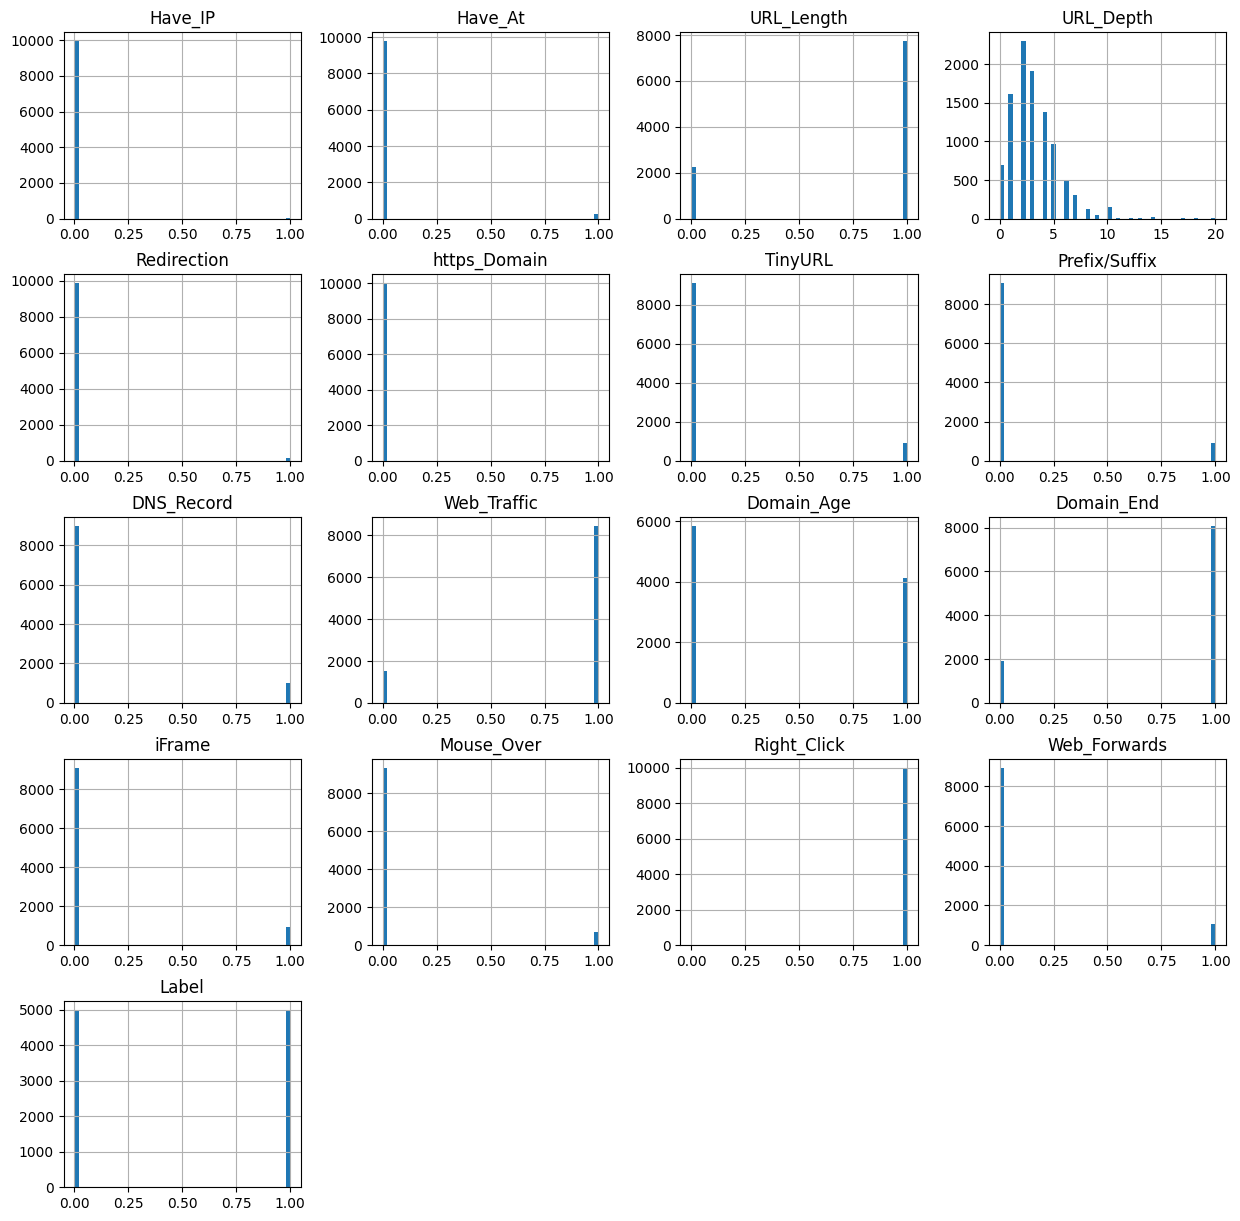

In [6]:
data.hist(bins = 50, figsize = (15,15))
plt.show()

In [7]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [8]:
data1 = data.drop(["Domain"], axis = 1).copy()
features = ["Have_IP", "Have_At", "URL_Length", "URL_Depth", "Redirection", "https_Domain", "TinyURL", "Prefix/Suffix", "DNS_Record", "Web_Traffic", "Domain_Age", "Domain_End", "iFrame", "Mouse_Over", "Right_Click", "Web_Forwards"]

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeClassifier

def create_pipeline():
    return make_pipeline(
        make_column_transformer(
            # (StandardScaler(), ["Domain"]), #1 Gone
            (StandardScaler(), ["Have_IP"]), #2
            (StandardScaler(), ["Have_At"]), #3
            (StandardScaler(), ["URL_Length"]), #4
            (StandardScaler(), ["URL_Depth"]), #5
            (StandardScaler(), ["Redirection"]), #6
            (StandardScaler(), ["https_Domain"]), #7
            (StandardScaler(), ["TinyURL"]), #8
            (StandardScaler(), ["Prefix/Suffix"]), #9
            (StandardScaler(), ["DNS_Record"]), #10
            (StandardScaler(), ["Web_Traffic"]), #11
            (StandardScaler(), ["Domain_Age"]), #12
            (StandardScaler(), ["Domain_End"]), #13
            (StandardScaler(), ["iFrame"]), #14
            (StandardScaler(), ["Mouse_Over"]), #15
            (StandardScaler(), ["Right_Click"]), #16
            (StandardScaler(), ["Web_Forwards"]), #17
            remainder="passthrough",
        ),

        #SGDRegressor(random_state=0),
        DecisionTreeClassifier(random_state=0),
    )

pipeline = create_pipeline()
pipeline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler-1',
                                                  StandardScaler(),
                                                  ['Have_IP']),
                                                 ('standardscaler-2',
                                                  StandardScaler(),
                                                  ['Have_At']),
                                                 ('standardscaler-3',
                                                  StandardScaler(),
                                                  ['URL_Length']),
                                                 ('standardscaler-4',
                                                  StandardScaler(),
                                                  ['URL_Depth']),
                                                 ('standardscaler-5',
                                                  StandardScaler(),
                                                  ['Redirection']...
                                                  ['Domain_Age']),
                                                 ('standardscaler-12',
                                                  StandardScaler(),
                                                  ['Domain_End']),
                                                 ('standardscaler-13',
                                                  StandardScaler(),
                                                  ['iFrame']),
                                                 ('standardscaler-14',
                                                  StandardScaler(),
                                                  ['Mouse_Over']),
                                                 ('standardscaler-15',
                                                  StandardScaler(),
                                                  ['Right_Click']),
                                                 ('standardscaler-16',
                                                  StandardScaler(),
                                                  ['Web_Forwards'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

In [10]:
pipeline.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('standardscaler-1', StandardScaler(),
                                    ['Have_IP']),
                                   ('standardscaler-2', StandardScaler(),
                                    ['Have_At']),
                                   ('standardscaler-3', StandardScaler(),
                                    ['URL_Length']),
                                   ('standardscaler-4', StandardScaler(),
                                    ['URL_Depth']),
                                   ('standardscaler-5', StandardScaler(),
                                    ['Redirection']),
                                   ('standardscaler-6', StandardScaler(...
                                   ('standardscaler-10', StandardScaler(),
                                    ['Web_Traffic']),
                                   ('standardscaler-11', StandardScaler

In [17]:
%time pipeline.fit(train_data[features], train_data[label])
score = pipeline.score(train_data[features], train_data[label])
print(f"{score:.3f}")

CPU times: total: 78.1 ms
Wall time: 75.8 ms
0.871


In [12]:
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

params = dict(
    decisiontreeclassifier__criterion=["gini", "entropy", "log_loss"],
    decisiontreeclassifier__max_features=["auto", "sqrt", "log2"]
)

pipeline = create_pipeline()

search = GridSearchCV(pipeline, params)
%time search.fit(train_data[features], train_data[label])
search.best_params_, f"{search.best_score_:.3f}"

CPU times: total: 3.22 s
Wall time: 3.73 s


({'decisiontreeclassifier__criterion': 'entropy',
  'decisiontreeclassifier__max_features': 'sqrt'},
 '0.858')

In [13]:
search.best_estimator_.steps[-1][1].n_features_in_

16

<Axes: >

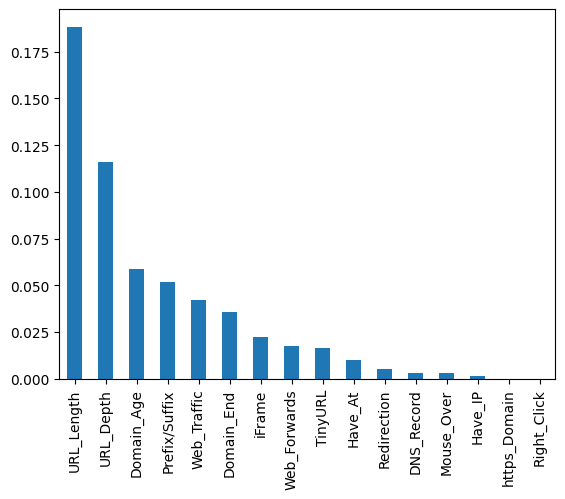

In [14]:
from sklearn.inspection import permutation_importance as per_imp

imps = per_imp(search.best_estimator_, valid_data[features], valid_data[label], random_state=0)
imps = pd.Series(imps.importances_mean, index=features).sort_values(ascending=False)
imps.plot(kind="bar")

In [15]:
samples = valid_data.sample(5, random_state=0)
samples

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
2832,olx.pl,0,0,1,7,0,0,0,0,0,1,1,1,0,0,1,0,0
6509,forms.gle,0,0,0,1,0,0,0,0,1,1,1,1,0,0,1,0,1
9854,umconnectumt-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,1,0,0,1,0,1
4651,persianblog.ir,0,0,1,4,0,0,0,0,1,1,1,1,1,1,1,1,0
4372,codecanyon.net,0,0,1,4,0,0,0,0,0,1,1,1,0,0,1,0,0


In [16]:
predicted = search.best_estimator_.predict(samples)
predicted

array([0, 1, 1, 0, 0], dtype=int64)

In [20]:
def predict(sample):
    predicted = search.best_estimator_.predict(sample)[0]

    predicted = int(predicted)
    return predicted

In [26]:
sample = {
    # "Domain": "forms.gle",
    "Have_IP": 0,
    "Have_At": 0,
    "URL_Length": 0,
    "URL_Depth": 1,
    "Redirection": 0,
    "https_Domain": 0,
    "TinyURL": 0,
    "Prefix/Suffix": 0,
    "DNS_Record": 1,
    "Web_Traffic": 1,
    "Domain_Age": 1,
    "Domain_End": 1,
    "iFrame": 0,
    "Mouse_Over": 0,
    "Right_Click": 1,
    "Web_Forwards": 0,
}

sample = pd.DataFrame([sample])
predicted = predict(sample)
predicted

1

In [27]:
sample = {
    # "Domain": "olx.pl",
    "Have_IP": 0,
    "Have_At": 0,
    "URL_Length": 1,
    "URL_Depth": 7,
    "Redirection": 0,
    "https_Domain": 0,
    "TinyURL": 0,
    "Prefix/Suffix": 0,
    "DNS_Record": 0,
    "Web_Traffic": 1,
    "Domain_Age": 1,
    "Domain_End": 1,
    "iFrame": 0,
    "Mouse_Over": 0,
    "Right_Click": 1,
    "Web_Forwards": 0,
}

sample = pd.DataFrame([sample])
predicted = predict(sample)
predicted

0

CPU times: total: 25.9 s
Wall time: 29.1 s


(0.0, 1.0)

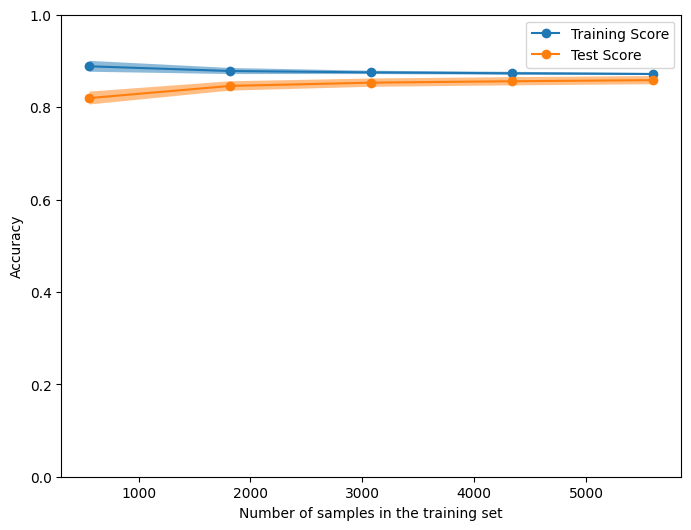

In [33]:
%%time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(figsize=(8, 6), sharey=True)

pipeline = create_pipeline()
pipeline.set_params(**search.best_params_)

LearningCurveDisplay.from_estimator(
    estimator=pipeline,
    X=train_data[features],
    y=train_data[label],
    train_sizes=np.linspace(0.1, 1.0, 5),
    cv=ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    score_type="both",
    line_kw=dict(marker="o"),
    std_display_style="fill_between",
    score_name="Accuracy",
    ax=ax,
)

handles, label = ax.get_legend_handles_labels()
ax.legend(handles[:2], ["Training Score", "Test Score"])
ax.set_ylim(ymin=0, ymax=1)